In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [2]:
import numpy as np

# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(info_A1)

# Identify numeric and string columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
string_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

Section 2: Initial Clustering and Evaluation (2 cluster)

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Function to evaluate clustering results
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette, kmeans_db_score, kmeans_ch_score = evaluate_clustering(kmeans_clusters, scaled_data)

print(f'KMeans Silhouette Score: {kmeans_silhouette}')
print(f'KMeans Davies-Bouldin Index: {kmeans_db_score}')
print(f'KMeans Calinski-Harabasz Index: {kmeans_ch_score}')

# Hierarchical Clustering
hca = AgglomerativeClustering(n_clusters=4)
hca_clusters = hca.fit_predict(scaled_data)
hca_silhouette, hca_db_score, hca_ch_score = evaluate_clustering(hca_clusters, scaled_data)

print(f'Hierarchical Clustering Silhouette Score: {hca_silhouette}')
print(f'Hierarchical Clustering Davies-Bouldin Index: {hca_db_score}')
print(f'Hierarchical Clustering Calinski-Harabasz Index: {hca_ch_score}')



# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)
gmm_silhouette, gmm_db_score, gmm_ch_score = evaluate_clustering(gmm_clusters, scaled_data)

print(f'GMM Silhouette Score: {gmm_silhouette}')
print(f'GMM Davies-Bouldin Index: {gmm_db_score}')
print(f'GMM Calinski-Harabasz Index: {gmm_ch_score}')

# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=42)
spectral_clusters = spectral.fit_predict(scaled_data)
spectral_silhouette, spectral_db_score, spectral_ch_score = evaluate_clustering(spectral_clusters, scaled_data)

print(f'Spectral Clustering Silhouette Score: {spectral_silhouette}')
print(f'Spectral Clustering Davies-Bouldin Index: {spectral_db_score}')
print(f'Spectral Clustering Calinski-Harabasz Index: {spectral_ch_score}')


KMeans Silhouette Score: 0.22297794473164229
KMeans Davies-Bouldin Index: 1.3758738682574192
KMeans Calinski-Harabasz Index: 148.97118448953557
Hierarchical Clustering Silhouette Score: 0.18706036428357806
Hierarchical Clustering Davies-Bouldin Index: 1.374033433548244
Hierarchical Clustering Calinski-Harabasz Index: 144.35584779452256
GMM Silhouette Score: 0.22297794473164229
GMM Davies-Bouldin Index: 1.3758738682574192
GMM Calinski-Harabasz Index: 148.97118448953557


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score: -0.036838877468066744
Spectral Clustering Davies-Bouldin Index: 16.35629417482484
Spectral Clustering Calinski-Harabasz Index: 1.056739889557026


Section 5: Visualization of Clustering Results

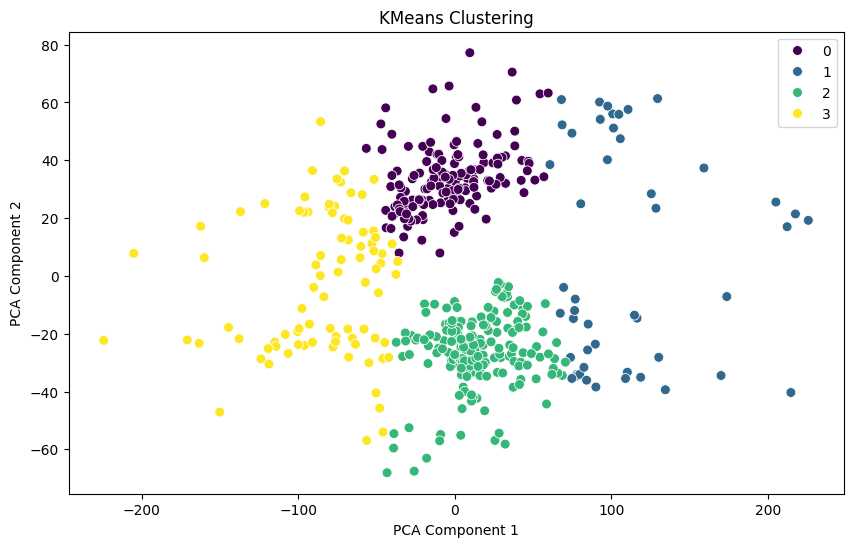

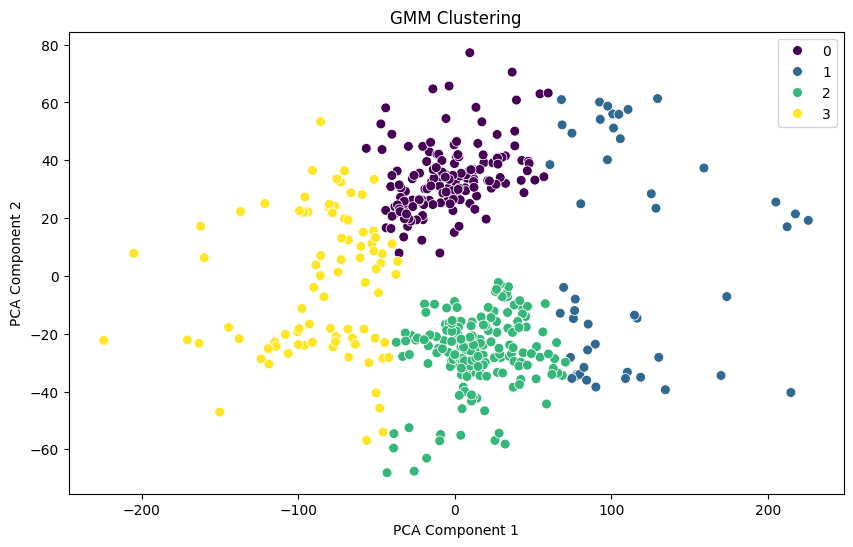

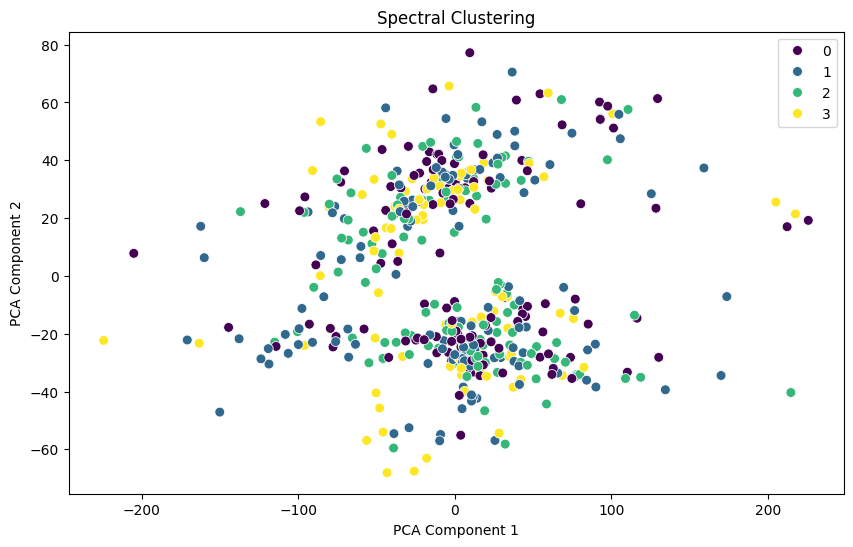

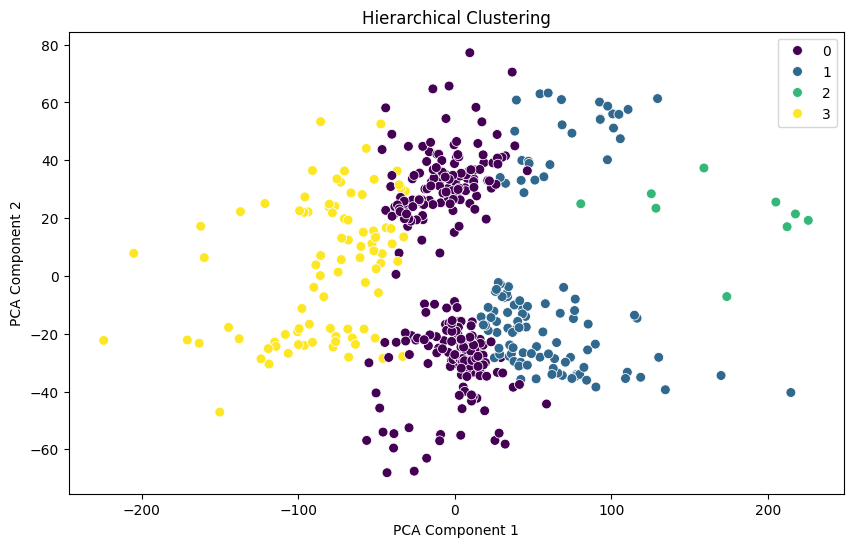

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best')
    plt.show()

# Plot KMeans clusters
plot_clusters(pca_data, kmeans_clusters, 'KMeans Clustering')

# Plot GMM clusters
plot_clusters(pca_data, gmm_clusters, 'GMM Clustering')


# Plot Spectral Clustering clusters
plot_clusters(pca_data, spectral_clusters, 'Spectral Clustering')

# Plot Hierarchical Clustering clusters
plot_clusters(pca_data, hca_clusters, 'Hierarchical Clustering')
